## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data = merged_data.groupby(["Mouse ID","Timepoint"])
unique_data = grouped_data.count()["Drug Regimen"].unstack()
duplicate_mouse_ID = unique_data.loc[unique_data[0] > 1].index[0]
duplicate_mouse_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data["Mouse ID"] == duplicate_mouse_ID]
duplicate_data.head(13)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[merged_data["Mouse ID"] != duplicate_mouse_ID]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = cleaned_data.groupby("Drug Regimen")

regimen_mean = regimen_data["Tumor Volume (mm3)"].mean()

regimen_median = regimen_data["Tumor Volume (mm3)"].median()

regimen_var = regimen_data["Tumor Volume (mm3)"].var(ddof=0)

regimen_std = regimen_data["Tumor Volume (mm3)"].std(ddof=0)

regimen_sem = regimen_data["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
print("Tumor Volume (mm3) Summary Statistics by Regimen")
regimen_st = pd.DataFrame({"Mean":regimen_mean, "Median":regimen_median, "Variance":regimen_var,
                          "Standard Deviation":regimen_std, "SEM":regimen_sem})
regimen_st

Tumor Volume (mm3) Summary Statistics by Regimen


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_st2 = regimen_data["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
regimen_st2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

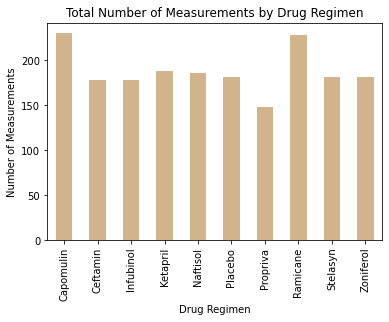

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = regimen_data["Tumor Volume (mm3)"].count()

bars = measurements.plot(kind="bar",title="Total Number of Measurements by Drug Regimen",
                                 ylabel="Number of Measurements",color="tan")

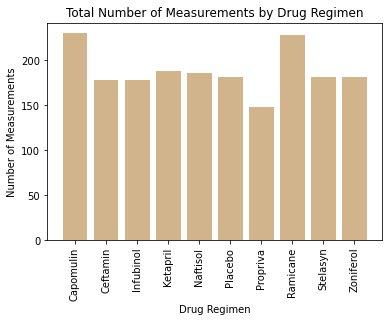

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(measurements.index, measurements,color="tan")
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.show()

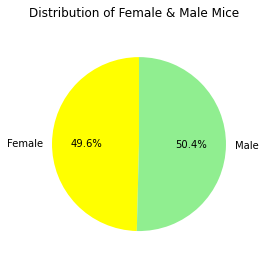

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = cleaned_data.groupby("Sex")
sex_counts = mouse_sex["Mouse ID"].nunique()

pie = sex_counts.plot.pie(subplots = True,title="Distribution of Female & Male Mice",
                          startangle=90,ylabel="",autopct="%1.1f%%",colors=["yellow","lightgreen"])

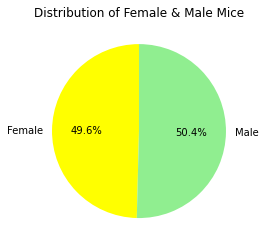

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts,labels=sex_counts.index,startangle=90,colors=["yellow","lightgreen"],autopct="%1.1f%%")
plt.title("Distribution of Female & Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_data = cleaned_data.groupby("Mouse ID")
last_timepoints = mouse_data["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoints,cleaned_data,how="left",on=["Mouse ID","Timepoint"])
final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_volumes = final_data.loc[final_data["Drug Regimen"] == treat]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(treatment_volumes.to_list())
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
      
    print(f"{treat} Regimen Results:")
    print(f"The 1st quartile for {treat} is: {lowerq}")
    print(f"The 3rd quartile for {treat} is: {upperq}")
    print(f"The interquartile range for {treat} is: {iqr}")
    print(f"The lower bound for {treat} is: {lower_bound}")
    print(f"The upper bound for {treat} is: {upper_bound}")
 
    outlier = False
    for x in treatment_volumes:
        if x < lower_bound or x > upper_bound:
            print(f"A potential outlier was found in the {treat} treatment regimen: {x}")
            outlier = True
            
    if outlier == False:
        print(f"No outliers were identified in the {treat} treatment regimen.")
            
    print()

Capomulin Regimen Results:
The 1st quartile for Capomulin is: 32.37735684
The 3rd quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The lower bound for Capomulin is: 20.70456164999999
The upper bound for Capomulin is: 51.83201549
No outliers were identified in the Capomulin treatment regimen.

Ramicane Regimen Results:
The 1st quartile for Ramicane is: 31.56046955
The 3rd quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The lower bound for Ramicane is: 17.912664470000003
The upper bound for Ramicane is: 54.30681135
No outliers were identified in the Ramicane treatment regimen.

Infubinol Regimen Results:
The 1st quartile for Infubinol is: 54.04860769
The 3rd quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The lower bound for Infubinol is: 36.83290494999999
The upper bound for Infubinol is: 82.74144559000001
A potential outlier was found in 

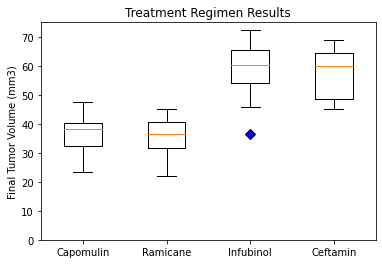

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data,labels=treatments,flierprops=dict(markerfacecolor="blue",marker="D",markersize=7))
plt.title("Treatment Regimen Results")
plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(0,75)
plt.show()

## Line and Scatter Plots

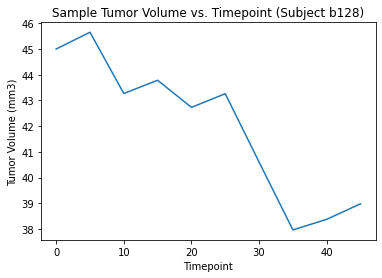

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

test_subject = capomulin.sample(1).iloc[0,0]

test_subject_data = cleaned_data.loc[cleaned_data["Mouse ID"] == test_subject]
test_subject_times = test_subject_data["Timepoint"]
test_subject_volumes = test_subject_data["Tumor Volume (mm3)"]

plt.plot(test_subject_times,test_subject_volumes)
plt.title(f"Sample Tumor Volume vs. Timepoint (Subject {test_subject})")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

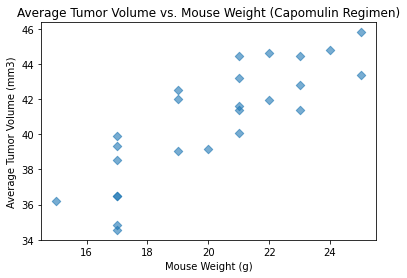

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = capomulin.groupby("Mouse ID")
capomulin_mice_weights = capomulin_mice["Weight (g)"].mean()
capomulin_mice_volumes = capomulin_mice["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_mice_weights,capomulin_mice_volumes,alpha=0.6,marker="D")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(capomulin_mice_weights,capomulin_mice_volumes)

regress_values = slope * capomulin_mice_weights + intercept

print(f"The Correlation Coefficient is {rvalue}.")

The Correlation Coefficient is 0.841936342469472.


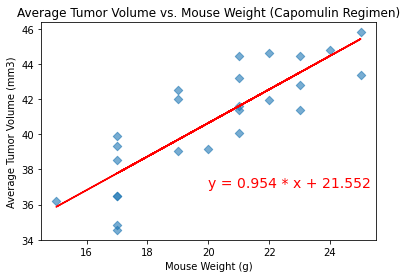

In [22]:
# Plot the linear regression model over the same plot as above
plt.scatter(capomulin_mice_weights,capomulin_mice_volumes,alpha=0.6,marker="D")

plt.plot(capomulin_mice_weights,regress_values, color="red")
plt.text(20,37,f"y = {round(slope,3)} * x + {round(intercept,3)}",color="red", fontsize=14)

plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Observations & Discussion

One observation we can make about this data is that while it appears that Ramicane may have performed slightly better than Capomulin in terms of reducing tumor volume, both appear to have performed better than Infubinol and Ceftamin. More analysis is needed to determine how each treatment actually changed tumor volume (instead of looking simply at the tumor volume at the end of the regimen). Indeed, when looking at the individual mice data for the Capomulin regimen, several mice had their tumor volume increase over time instead of decrease.

While it may be difficult to draw many conclusions based on the summary statistics (since timecount is not accounted for), it is noteworthy that Capomulin and Ramicane both had smaller mean and median measures, as well as smaller standard deviation and SEM values. This consistency and smaller spread is evident in the smaller interguartile ranges found in these regimen results compared to other treatments, also.

Based on the high correlation found between average tumor volume and mouse weight (r = 0.8419), further analysis would be required to determine whether tumor size was significantly impacted by the different regimens or by mouse weight, or whether the mice who went through other regimens had the same distribution of weight.